In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import seaborn as sns
import anndata
import scanpy as sc

from scroutines import basicu
from scroutines import powerplots
from scroutines.config_plots import *
import importlib
importlib.reload(basicu)

<module 'scroutines.basicu' from '/u/project/zipursky/f7xiesnm/code/scroutines/scroutines/basicu.py'>

In [2]:
sns.set_context('talk')

In [3]:
outdir = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis"
outdir

'/u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis'

# get data

In [4]:
# get updated cell types
f = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results/allL23_newtypes.csv"
meta = pd.read_csv(f, index_col=0)
meta

/tmp/ipykernel_2734/12491127.py:3: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f, index_col=0)


,Class_broad,Doublet,Doublet Score,batch,leiden,n_counts,n_genes,percent_mito,sample,Type,Subclass,cond,easitype,umap1,umap2,easisample,easicond,newtype
AAACGCTCACTTCATT-1-P8_1a-P8,Excitatory,False,0.025713,1,0,23384.0,4943,0.000128,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGATAGGTGCATG-1-P8_1a-P8,Excitatory,False,0.011883,1,0,17774.0,4698,0.000169,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGGCCAGTATACC-1-P8_1a-P8,Excitatory,False,0.024667,1,0,15872.0,4173,0.000126,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCCATATACCG-1-P8_1a-P8,Excitatory,False,0.027921,1,0,20076.0,4761,0.000050,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCTCAGATGCT-1-P8_1a-P8,Excitatory,False,0.009527,1,4,19061.0,4601,0.000000,P8_1a,L2/3_BC,L2/3,P8NR,L2/3_C,NaN,NaN,1a,1-P08NR,L2/3_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAGTTGTTG-1-P38_dr_1a,NaN,False,0.042872,11,1,11379.0,3568,0.000879,P38_dr_1a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,1a,2-P38DR,L2/3_B
TTTGGTTTCTGCCTGT-1-P38_dr_2b,NaN,False,0.007108,2,1,16050.0,3104,0.000062,P38_dr_2b,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2b,2-P38DR,L2/3_B
TTTGTTGCACCGGTCA-1-P38_dr_2a,NaN,False,0.030928,2,1,13955.0,3739,0.001146,P38_dr_2a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2a,2-P38DR,L2/3_B
TTTGTTGGTGGCTAGA-1-P38_dr_2b,NaN,False,0.015884,3,4,7272.0,2789,0.000963,P38_dr_2b,L2/3_2,L2/3,P38DR,L2/3_B,NaN,NaN,2b,2-P38DR,L2/3_A


In [5]:
ddir = '../../data/cheng21_cell_scrna/organized/'
files = [
    'P28NR.h5ad',
    'P38NR.h5ad',
    
    'P28DR.h5ad',
    'P38DR.h5ad',
] 

In [6]:
pbulks = []
xclsts = []
xcnsts = []

ncond, nrep, nclst, ngene = 4,2,20, -1, #42-3,-1 # remove 3 L4 types

for f in files:
    print(f)

    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values

    adata = adata[adata.obs['Subclass'] == 'L2/3']
    
    # update 
    tmp = adata.obs.copy()
    # 1 or 2
    sample_codes = tmp['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
    tmp['sample_code'] = sample_codes

    types = tmp['Subclass'].astype(str).values

    sample_and_type = sample_codes + "_" + types
    tmp['sample_and_type'] = sample_and_type

    # group data
    _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(adata.X, sample_and_type) 

    unqs, cnts = np.unique(sample_and_type, return_counts=True)

    pbulks.append(Xk_ln)
    xclsts.append(_xclsts)
    xcnsts.append(cnts)


P28NR.h5ad
P38NR.h5ad
P28DR.h5ad
P38DR.h5ad


In [7]:
pbulks = np.array(pbulks)
xcnsts = np.array(xcnsts)
xclsts = np.array(xclsts)
pbulks = pbulks.reshape(ncond,nrep,-1)
xcnsts = xcnsts.reshape(ncond,nrep)
xclsts = xclsts.reshape(ncond,nrep)

pbulks = pbulks.reshape(2,4,pbulks.shape[2])

print(pbulks.shape, xcnsts.shape, xclsts.shape)

(2, 4, 53801) (4, 2) (4, 2)


In [8]:
xclsts_short = ['L2/3']

In [9]:
tensor_nr = pbulks[0].T
tensor_dr = pbulks[1].T

# mean exp of CPM=10 in any subclass in either NR or DR
expressed_nr  = np.mean(tensor_nr, axis=1) > np.log10(10+1) 
expressed_dr  = np.mean(tensor_dr, axis=1) > np.log10(10+1) 
expressed_any = np.logical_or(expressed_nr, expressed_dr)
print(expressed_any.sum())

genes_comm = genes[expressed_any]
genes_cidx = np.arange(len(genes))[expressed_any] 
tensor_nr = pbulks[0].T[genes_cidx]
tensor_dr = pbulks[1].T[genes_cidx]

# test for each gene and cell type; 4 rep vs 4 rep - t-test and p-val correction 
ts, ps = ttest_ind(tensor_nr, tensor_dr, axis=1)
rs, qs, _, _ = multipletests(np.nan_to_num(ps, nan=1).reshape(-1,), method='fdr_bh')
rs = rs.reshape(ps.shape)
qs = qs.reshape(ps.shape)

# effect size
lfc = np.log2(10)*(np.mean(tensor_dr, axis=1) - np.mean(tensor_nr, axis=1)) # log2FC (log10CPM as raw counts)

fc_threshold = 2
cond1   = rs # FDR< 0.05
cond2   = np.abs(lfc) >  np.log2(fc_threshold) 
cond2up = lfc         >  np.log2(fc_threshold) 
cond2dn = lfc         < -np.log2(fc_threshold) 

sde    = np.all([cond1, cond2],   axis=0)
sde_up = np.all([cond1, cond2up], axis=0)
sde_dn = np.all([cond1, cond2dn], axis=0)

sigsum = pd.DataFrame(index=xclsts_short)
sigsum['rej']   = np.sum(rs, axis=0)
sigsum['DE']    = np.sum(sde, axis=0)
sigsum['DR_up'] = np.sum(sde_up, axis=0)
sigsum['DR_dn'] = np.sum(sde_dn, axis=0)

8725


In [10]:
sigsum

,rej,DE,DR_up,DR_dn
L2/3,1679,187,142,45


# single-cell level

In [11]:
ddir = '../../data/cheng21_cell_scrna/organized/'
files = [
    'P28NR.h5ad',
    'P38NR.h5ad',
    
    'P28DR.h5ad',
    'P38DR.h5ad',
] 

In [12]:
adata_all = []
for f in files:
    print(f)

    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values

    adata = adata[adata.obs['Subclass'] == 'L2/3']
    adata = adata[:,expressed_any]
    adata.obs['cond'] = f[len('P28'):-len('.h5ad')]
    adata_all.append(adata)

P28NR.h5ad


/tmp/ipykernel_2734/4077819570.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cond'] = f[len('P28'):-len('.h5ad')]


P38NR.h5ad


/tmp/ipykernel_2734/4077819570.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cond'] = f[len('P28'):-len('.h5ad')]


P28DR.h5ad


/tmp/ipykernel_2734/4077819570.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cond'] = f[len('P28'):-len('.h5ad')]


P38DR.h5ad


/tmp/ipykernel_2734/4077819570.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cond'] = f[len('P28'):-len('.h5ad')]


In [13]:
print(adata_all[0])
print(adata_all[1])
print(adata_all[2])
print(adata_all[3])

AnnData object with n_obs × n_vars = 4044 × 8725
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'sample_new', 'layer', 'Type', 'Subclass', 'cond'
AnnData object with n_obs × n_vars = 2697 × 8725
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass', 'cond'
AnnData object with n_obs × n_vars = 4704 × 8725
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'sample', 'layer', 'cluster', 'Type', 'Subclass', 'Class_broad', 'cond'
AnnData object with n_obs × n_vars = 5165 × 8725
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'sample', 'cluster', 'Type', 'Subclass', 'Class_broad', 'cond'


In [14]:
adata = anndata.concat(adata_all)
lnormed = np.log10(1+basicu.libsize_norm(np.array(adata.X.todense()), scale=1e4))
adata.X = lnormed

In [15]:
sc.tl.rank_genes_groups(adata, 'cond')

In [16]:
res_dr = sc.get.rank_genes_groups_df(adata, 'DR').set_index('names').reindex(genes_comm)
res_nr = sc.get.rank_genes_groups_df(adata, 'NR').set_index('names').reindex(genes_comm)
res_dr

,scores,logfoldchanges,pvals,pvals_adj
names,,,,
Xkr4,0.039230,0.000429,9.687076e-01,9.710448e-01
Gm1992,-6.596500,-0.355558,4.366220e-11,8.088168e-11
Mrpl15,-2.777475,-0.152768,5.485548e-03,6.828564e-03
Tcea1,-0.332563,-0.014590,7.394691e-01,7.561078e-01
Rgs20,-4.524503,-0.101821,6.099658e-06,8.924957e-06
...,...,...,...,...
mt-Nd4,15.032704,0.403376,1.006467e-50,5.694828e-50
mt-Nd5,9.172885,0.446753,5.165444e-20,1.326715e-19
mt-Cytb,8.638061,0.220540,6.280843e-18,1.502203e-17


In [17]:
cond1 = res_nr['logfoldchanges'] > 1
cond2 = res_dr['logfoldchanges'] > 1

cond3 = res_nr['pvals_adj'] < 0.05
cond4 = res_dr['pvals_adj'] < 0.05

In [18]:
cond1.sum(), cond2.sum(), cond3.sum(), cond4.sum() 

(57, 215, 7486, 7486)

Text(0, 0.5, 'log2FC pseudu-bulk')

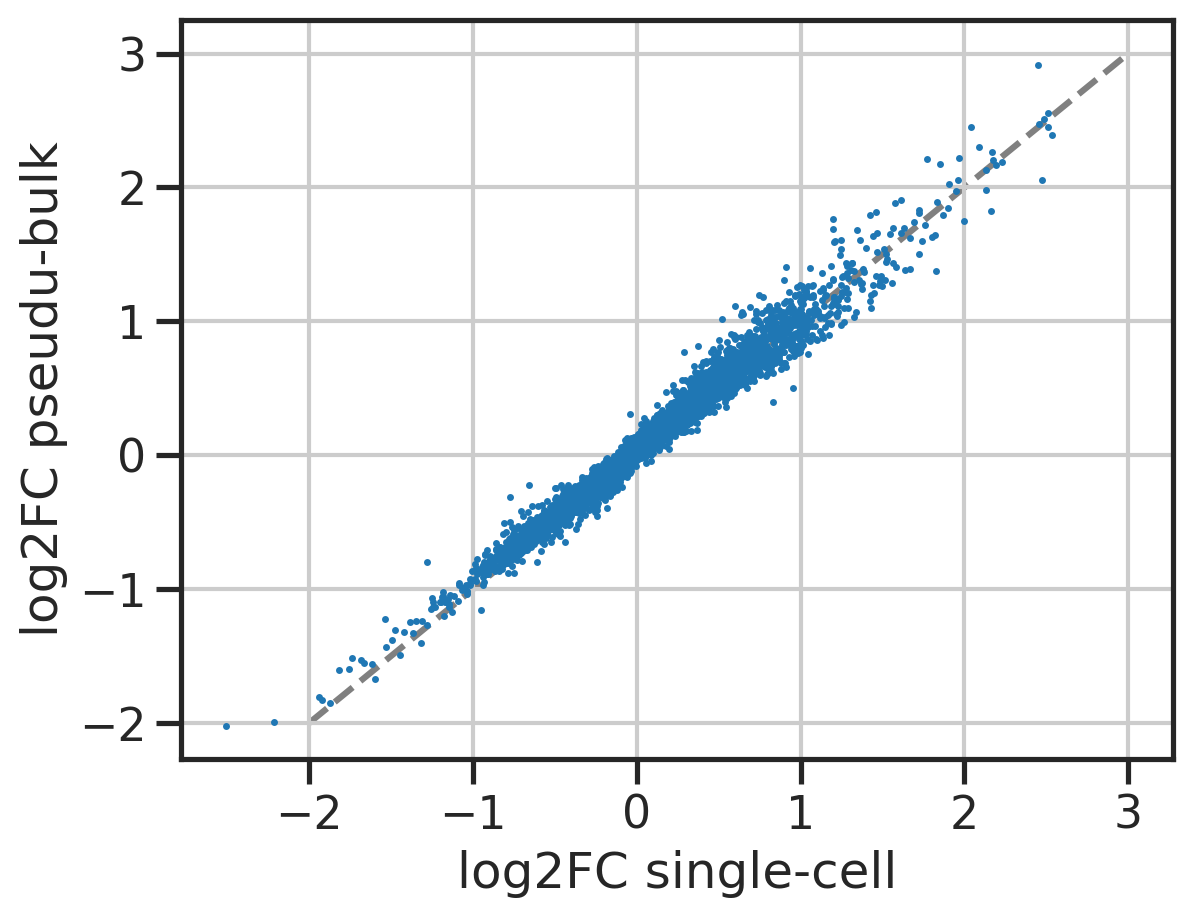

In [19]:
fig, ax = plt.subplots()
ax.scatter(res_dr['logfoldchanges'], lfc, s=1)
ax.plot([-2, 3], [-2, 3], color='gray', zorder=0, linestyle='--')
ax.set_xlabel('log2FC single-cell')
ax.set_ylabel('log2FC pseudu-bulk')

In [20]:
sde_sc = np.logical_or(np.logical_and(cond1, cond3), np.logical_and(cond2, cond4))
sde_sc.sum()

272

In [21]:
sde.sum()

187

In [22]:
sde.sum(), sde_sc.sum() #.shape

(187, 272)

In [23]:
sde_bth = np.logical_and(sde, sde_sc)
sde_bth.sum()

141

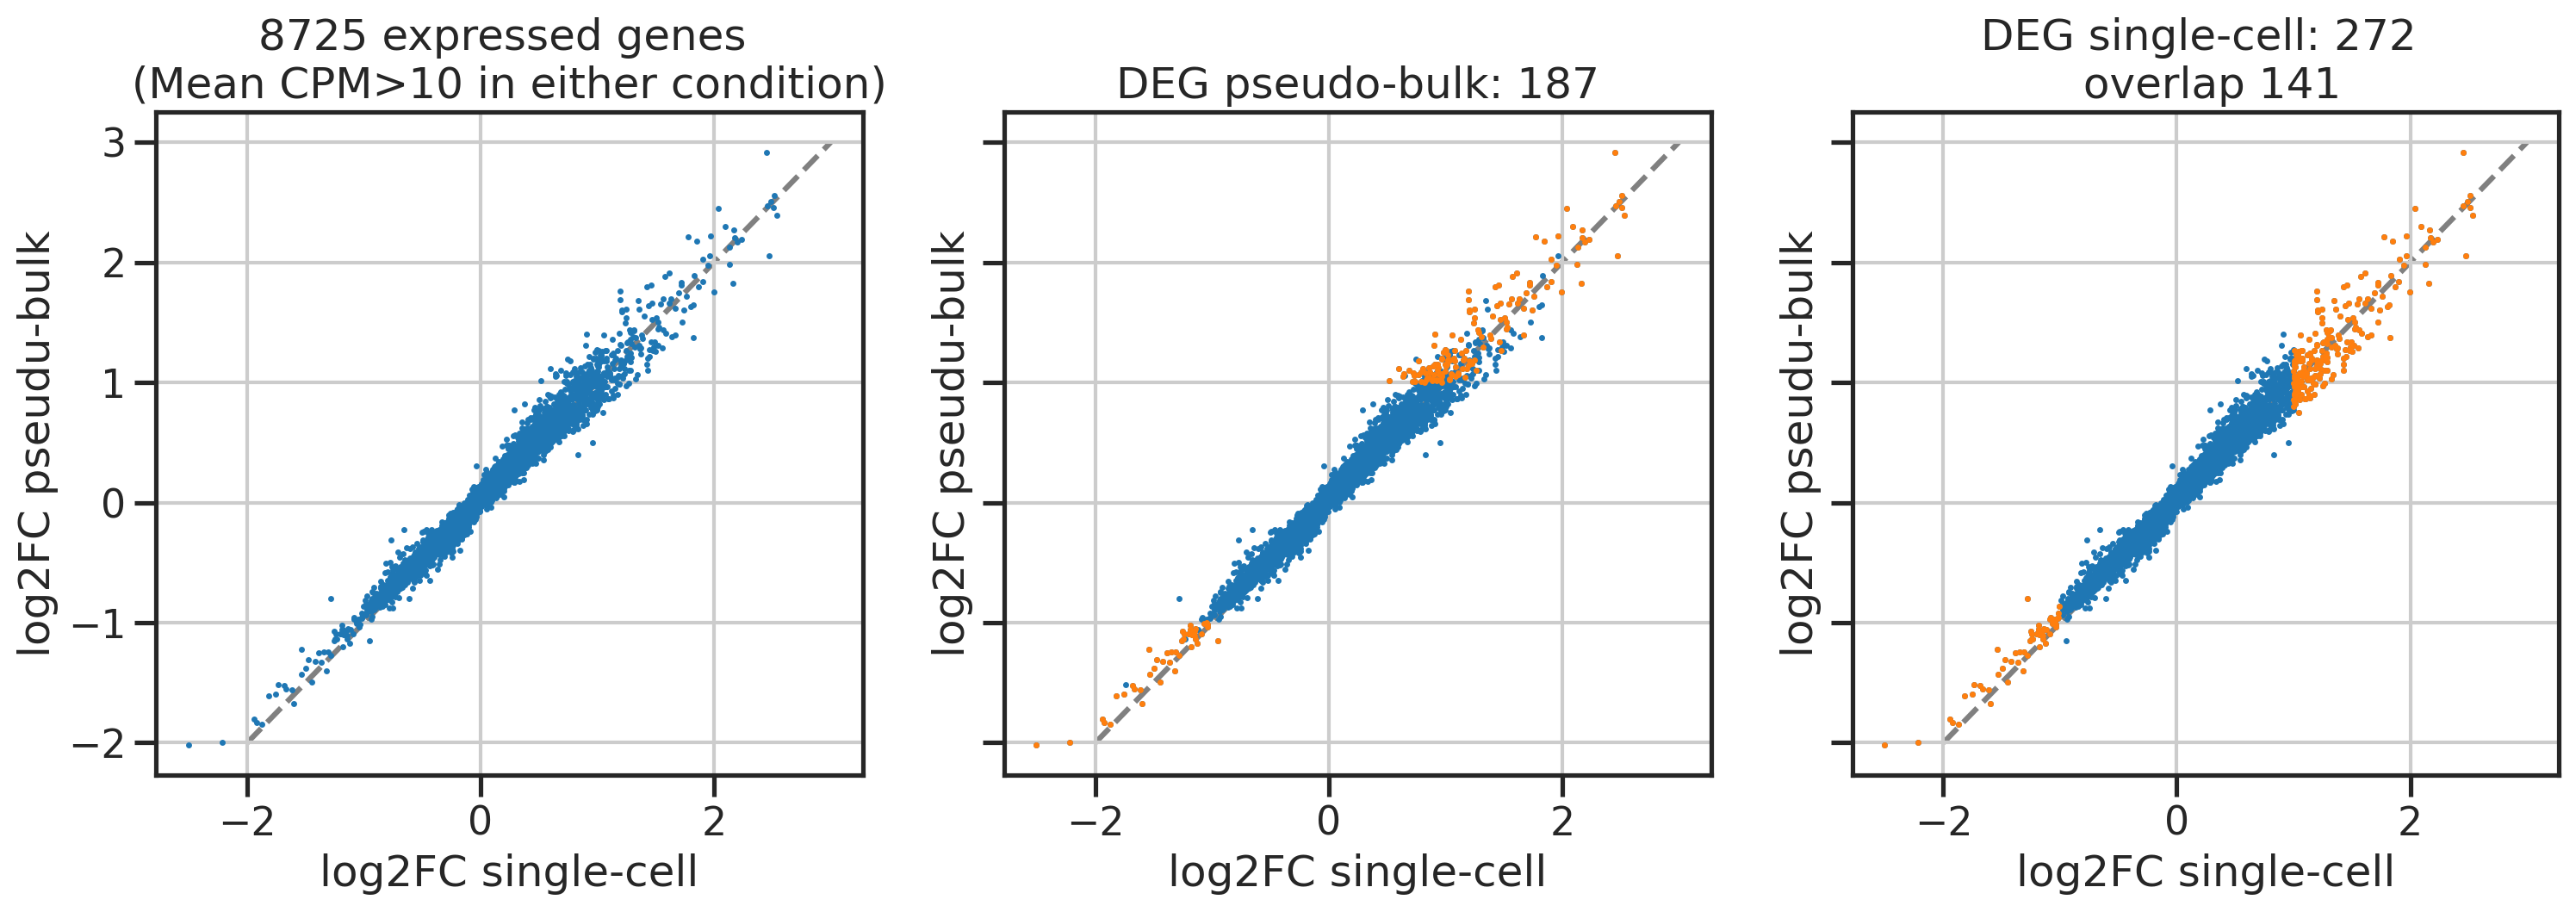

In [24]:
fig, axs = plt.subplots(1,3,figsize=(3*6,1*5), sharex=True, sharey=True)
ax = axs[0]
ax.scatter(res_dr['logfoldchanges'], lfc, s=1)
ax.plot([-2, 3], [-2, 3], color='gray', zorder=0, linestyle='--')
ax.set_xlabel('log2FC single-cell')
ax.set_ylabel('log2FC pseudu-bulk')
ax.set_title(f'{expressed_any.sum()} expressed genes \n(Mean CPM>10 in either condition)')

ax = axs[1]
ax.scatter(res_dr['logfoldchanges'], lfc, s=1)
ax.scatter(res_dr['logfoldchanges'][sde], lfc[sde], s=1)
ax.plot([-2, 3], [-2, 3], color='gray', zorder=0, linestyle='--')
ax.set_xlabel('log2FC single-cell')
ax.set_ylabel('log2FC pseudu-bulk')
ax.set_title(f'DEG pseudo-bulk: {sde.sum()}')

ax = axs[2]
ax.scatter(res_dr['logfoldchanges'], lfc, s=1)
ax.scatter(res_dr['logfoldchanges'][sde_sc], lfc[sde_sc], s=1)
ax.plot([-2, 3], [-2, 3], color='gray', zorder=0, linestyle='--')
ax.set_xlabel('log2FC single-cell')
ax.set_ylabel('log2FC pseudu-bulk')
ax.set_title(f'DEG single-cell: {sde_sc.sum()} \n overlap {sde_bth.sum()}')
plt.show()

# ax.scatter(res_dr['logfoldchanges'][sde_sc], lfc[sde_sc], s=1)
# ax.scatter(res_dr['logfoldchanges'][sde_bth], lfc[sde_bth], s=1)


/u/home/f/f7xiesnm/.conda/envs/napari/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


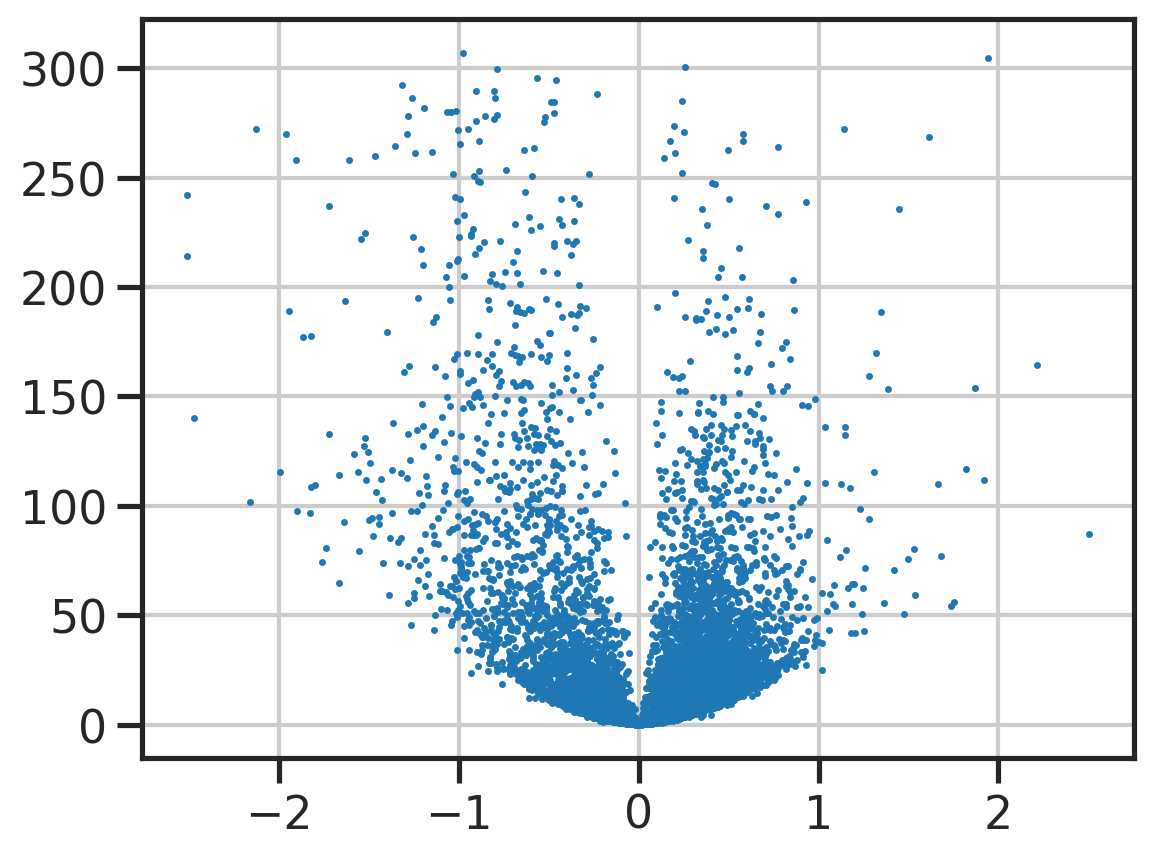

In [25]:
plt.scatter(res_nr['logfoldchanges'], -np.log10(res_nr['pvals_adj']), s=1)